In [19]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torchvision.transforms.functional as F
import face_recognition
from itertools import combinations
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [3]:
sample_df = pd.read_csv('../data/celeb_dataset/samples.csv')
sample_df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'found'],
      dtype='object')

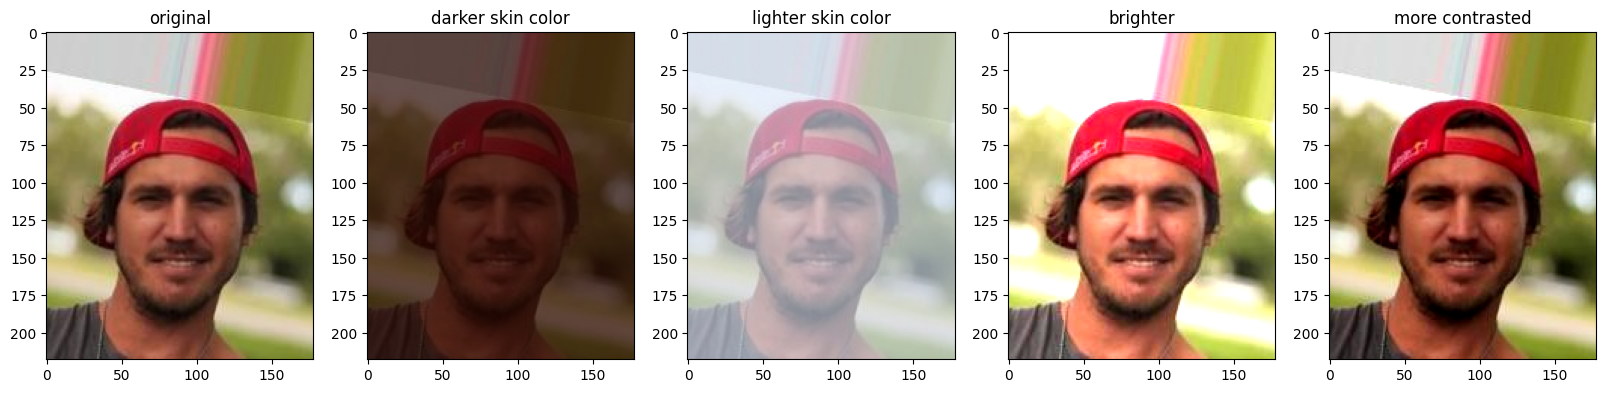

In [4]:
parent_dir = "/home/bence/ITU_notes/Algorithmic_fairness/FairFaceRecognition/data/celeb_dataset/img_align_celeba"
subdirs = ["/img_align_celeba","/darker_skin","/lighter_skin"]
titles = ["original","darker skin color","lighter skin color"]
image_id = sample_df.iloc[0]['image_id']
fig, axs = plt.subplots(1,5,figsize=(20,5))
for dir in subdirs:
    img = Image.open(parent_dir+ dir + f"/{image_id}")
    img = np.array(img)
    axs[subdirs.index(dir)].imshow(img)
    axs[subdirs.index(dir)].set_title(titles[subdirs.index(dir)])

img = Image.open(parent_dir+ "/img_align_celeba" + f"/{image_id}")
img_adjusted = F.adjust_brightness(img, 1.5)
br_img = np.asarray(img_adjusted)
axs[3].imshow(br_img)
axs[3].set_title("brighter")

img_adjusted = F.adjust_contrast(img, 1.2)
dr_img = np.asarray(img_adjusted)
axs[4].imshow(dr_img)
axs[4].set_title("more contrasted")
#set higer resolution
plt.savefig('augmentations.png', dpi=300)

(86, 135, 176, 46)


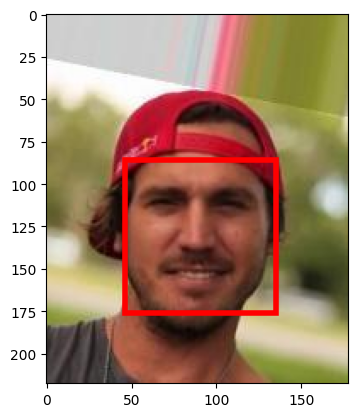

In [5]:
root_folder = parent_dir + "/img_align_celeba/"
img = face_recognition.load_image_file(root_folder + sample_df.iloc[0]['image_id'])
locs = face_recognition.face_locations(img)[0]
print(locs)
plt.imshow(img)
ax = plt.gca()
rect = patches.Rectangle((locs[3], locs[0]), locs[1]-locs[3], locs[2]-locs[0], linewidth=4, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [11]:
new_sample_df = pd.read_csv('../data/preds_on_all_augmentations.csv')
pred_combs = list(combinations(new_sample_df.columns[-5:],2))

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
error
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young
Recognized
error
Recognized_lighter_skin
error
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


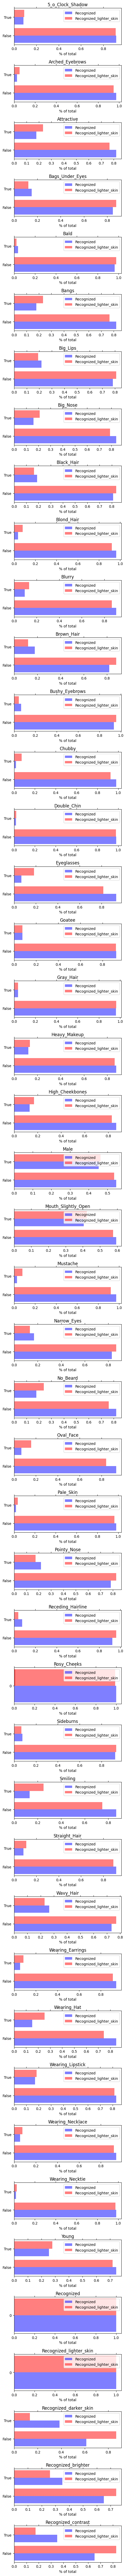

In [12]:
col1,col2 = pred_combs[0]
col1,col2 = str(col1), str(col2)
df1 = new_sample_df.query(f'{col1} == -1 and {col2} == 1').set_index('image_id')
df2 = new_sample_df.query(f'{col1} == 1 and {col2} == -1').set_index('image_id')

bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(df1.columns), figsize=(5, 100))

for i, col in enumerate(df1.columns):
    # Calculate the position for the bars

    positions = np.arange(len(df1[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, df1[col].value_counts()/len(df1), height=bar_width, color='blue',
                alpha=0.5, label=col1)

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset,df2[col].value_counts()/len(df2), height=bar_width, color='red',
                alpha=0.5, label=col2)

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(df1[col].value_counts().index)
    try:
        axs[i].set_yticklabels(['False', 'True'])
    except:
        print('error')
    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()

In [13]:
differnce_tab_dict = {}
for c in new_sample_df.columns[-5:]:
    differnce_tab_dict[c] = []
    for c2 in new_sample_df.columns[-5:]:
        col1,col2 = str(c), str(c2)
        df2 = new_sample_df.query(f'{col1} == 1 and {col2} == -1').set_index('image_id')
        differnce_tab_dict[c].append(df2.shape[0])
differnce_tab_dict

{'Recognized': [0, 300, 499, 241, 68],
 'Recognized_lighter_skin': [106, 0, 304, 232, 85],
 'Recognized_darker_skin': [78, 77, 0, 190, 63],
 'Recognized_brighter': [529, 714, 899, 0, 424],
 'Recognized_contrast': [286, 497, 702, 354, 0]}

In [14]:
t_index = ['original','lighter filter','darker filter','brighter','more contrast']

cross_df = pd.DataFrame(differnce_tab_dict, index=t_index)
cross_df.columns = t_index
cross_df

,original,lighter filter,darker filter,brighter,more contrast
original,0,106,78,529,286
lighter filter,300,0,77,714,497
darker filter,499,304,0,899,702
brighter,241,232,190,0,354
more contrast,68,85,63,424,0


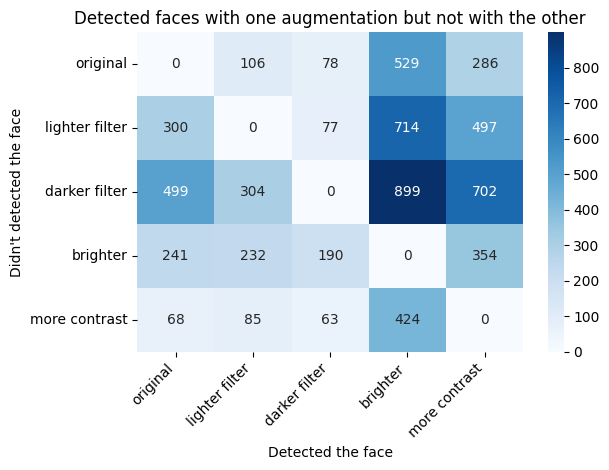

In [17]:
cross_heat_map = sns.heatmap(cross_df, annot=True, cmap='Blues', fmt='g')
cross_heat_map.set_title('Detected faces with one augmentation but not with the other')
cross_heat_map.set_xlabel('Detected the face')
cross_heat_map.set_ylabel("Didn't detected the face")
cross_heat_map.set_xticklabels(cross_heat_map.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.savefig('detected_faces_with_one.png')

In [24]:
new_sample_df.set_index('image_id', inplace=True)

In [25]:


all_rec_df = new_sample_df.query('Recognized == 1 and Recognized_lighter_skin == 1 \
                    and Recognized_darker_skin == 1 \
                    and Recognized_brighter == 1 \
                    and Recognized_contrast == 1')

non_rec_df = new_sample_df.query('Recognized == -1 \
                    and Recognized_lighter_skin == -1 \
                    and Recognized_darker_skin == -1 \
                    and Recognized_brighter == -1 \
                    and Recognized_contrast == -1')
some_rec_df = new_sample_df.copy()
some_rec_df = some_rec_df[~some_rec_df.isin(non_rec_df)].dropna(how='all')
some_rec_df = some_rec_df[~some_rec_df.isin(all_rec_df)].dropna(how='all')

binary_features = list(new_sample_df.columns[:-5])
augs = list(new_sample_df.columns[-5:])

/tmp/ipykernel_13540/719956713.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_13540/719956713.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_13540/719956713.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_13540/719956713.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_13540/719956713.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_13540/719956713.py:17: UserWarning: FixedFormatter should on

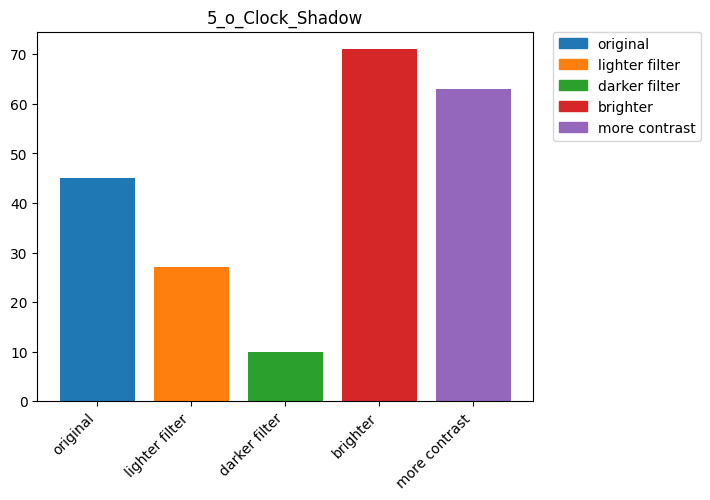

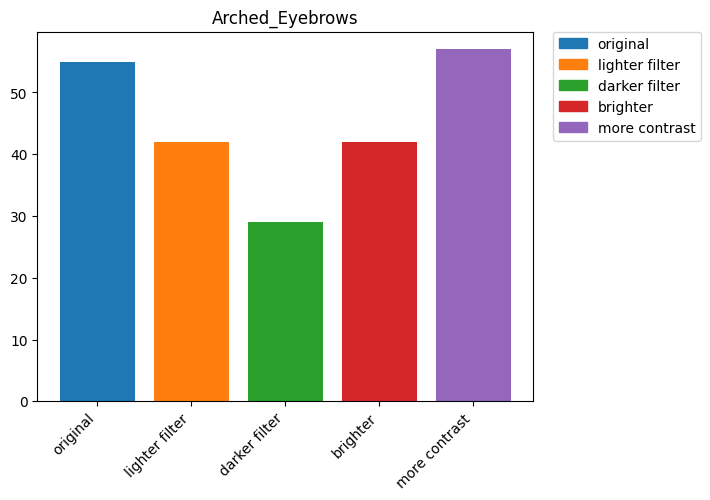

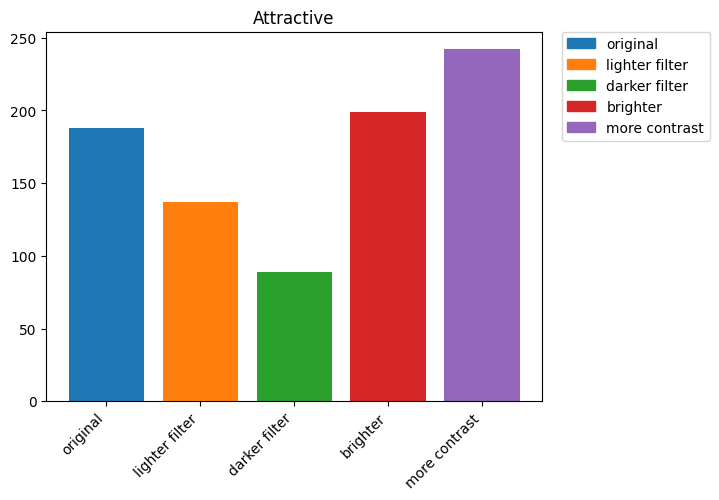

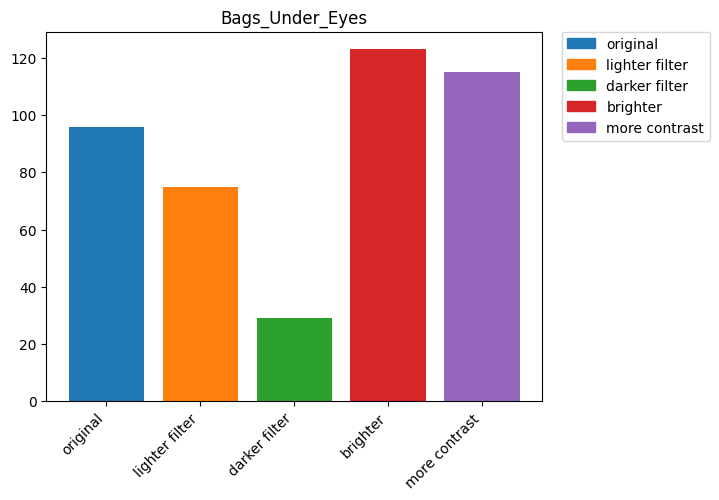

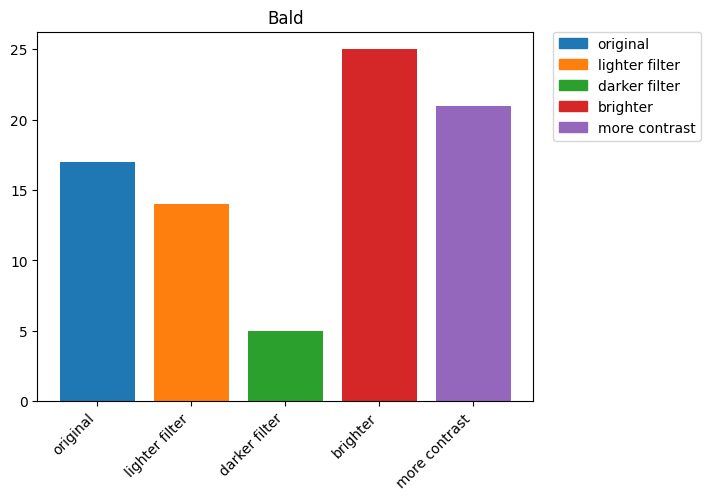

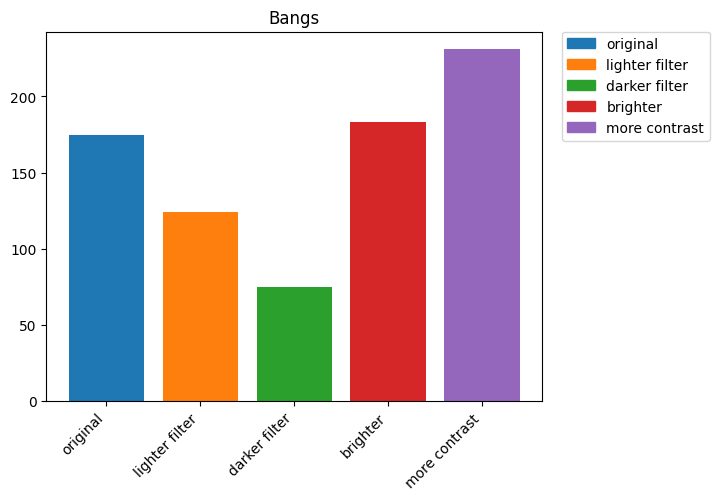

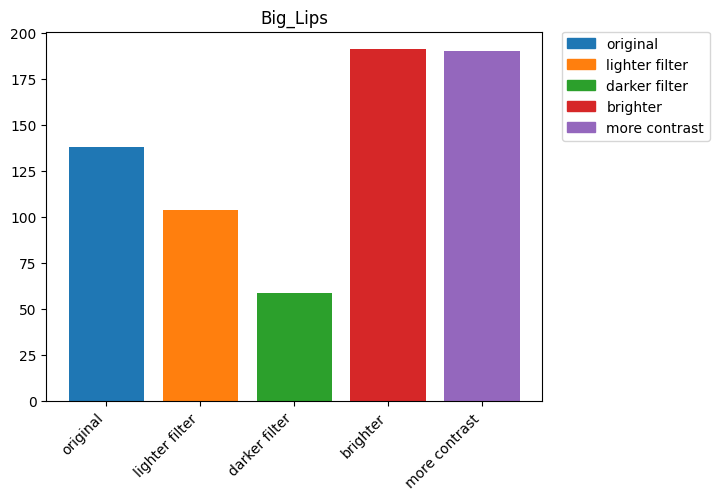

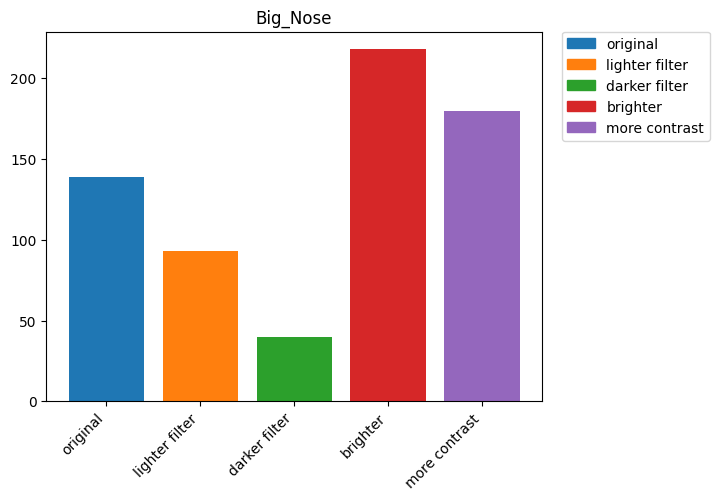

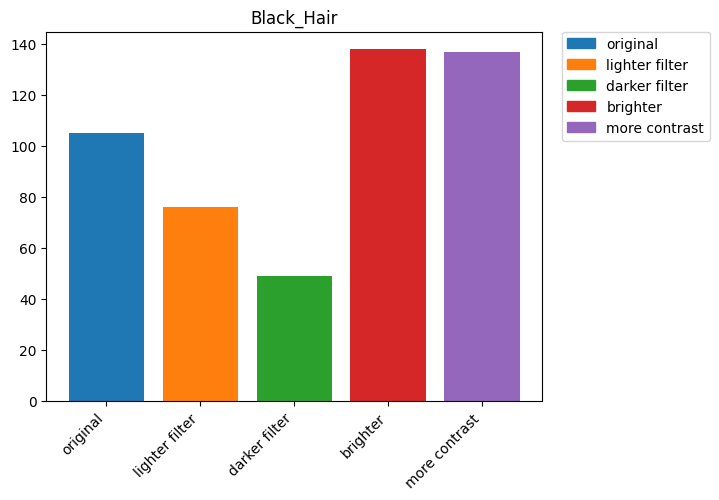

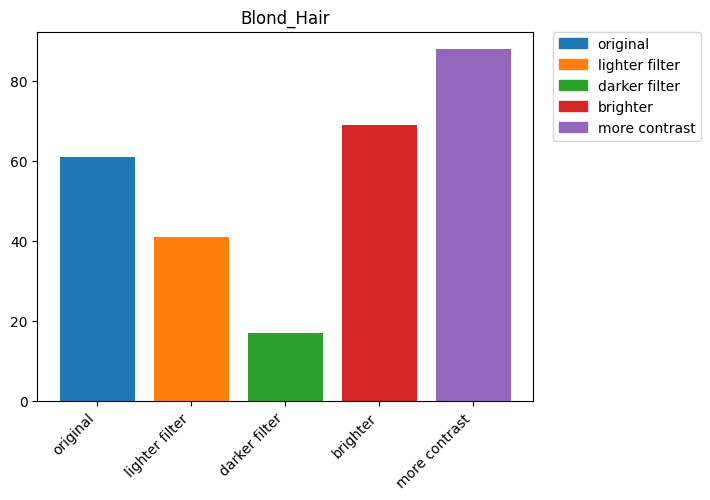

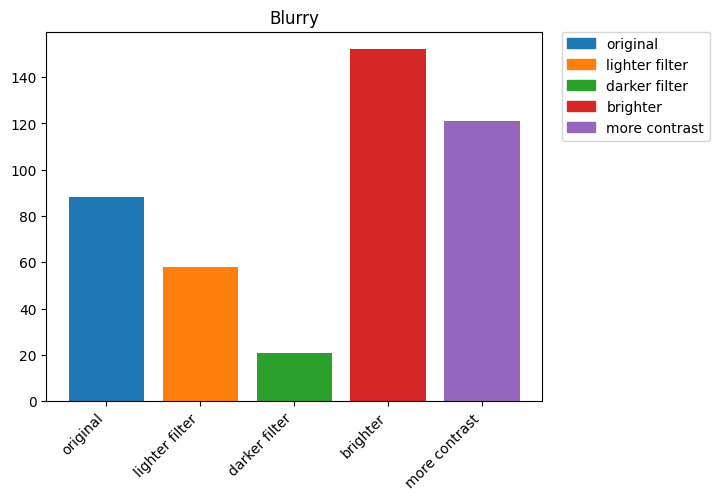

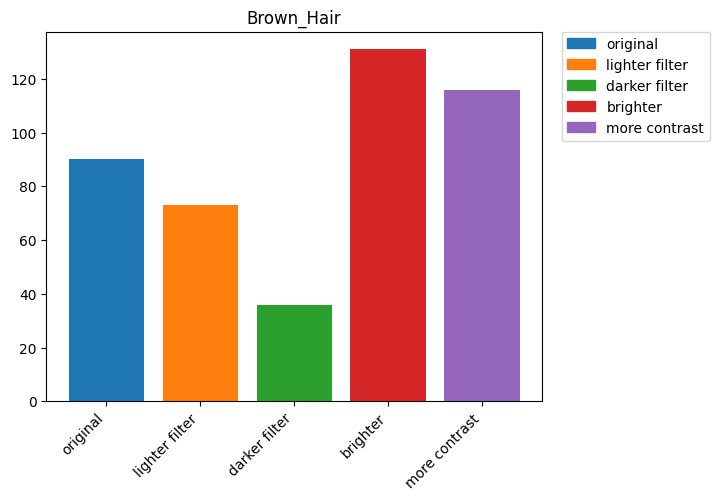

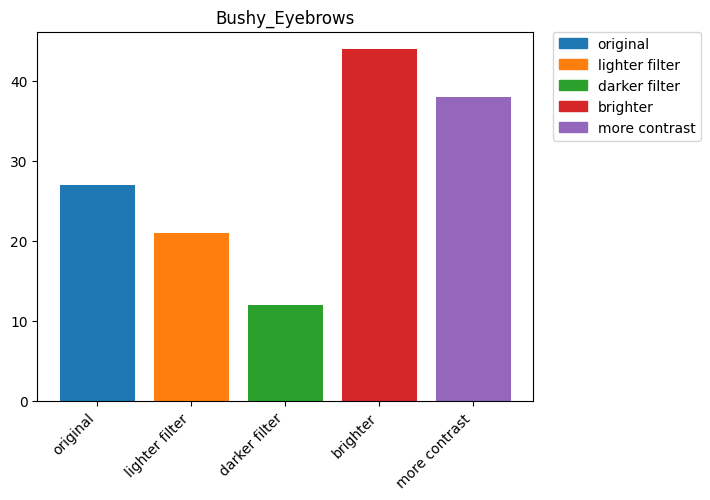

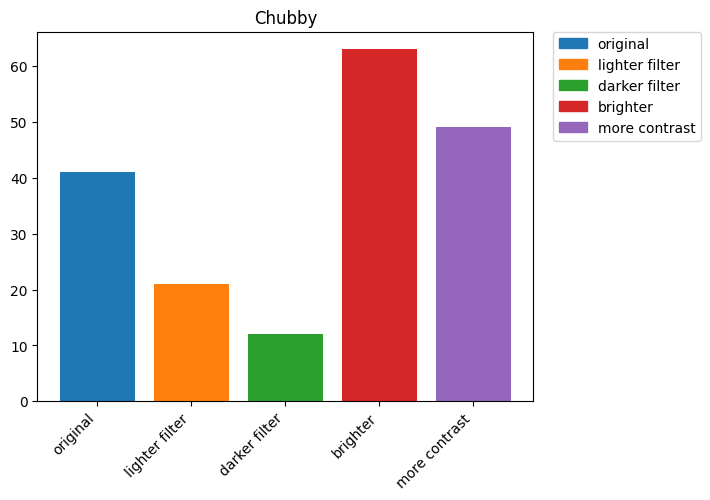

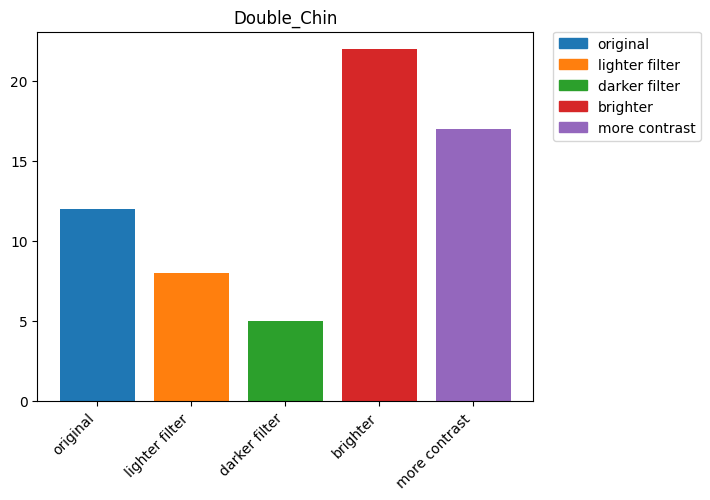

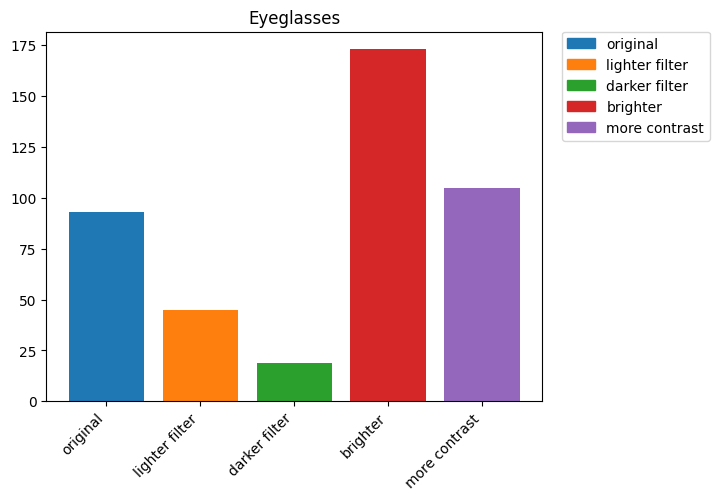

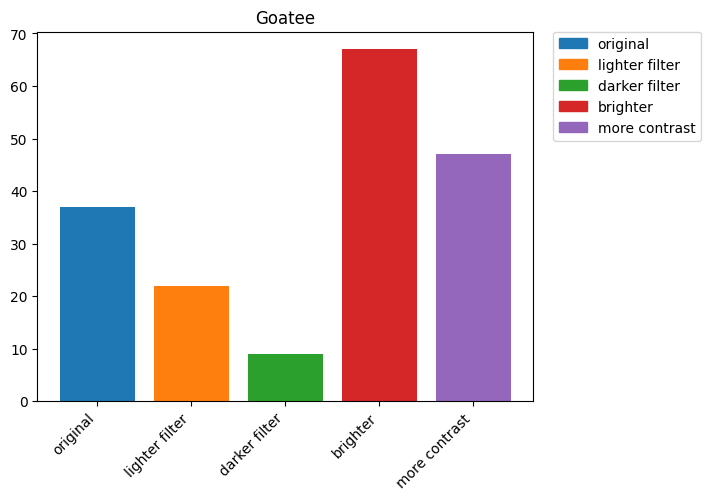

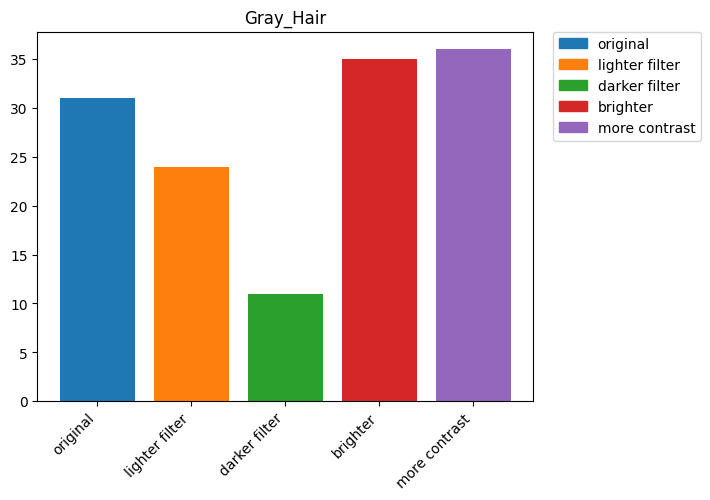

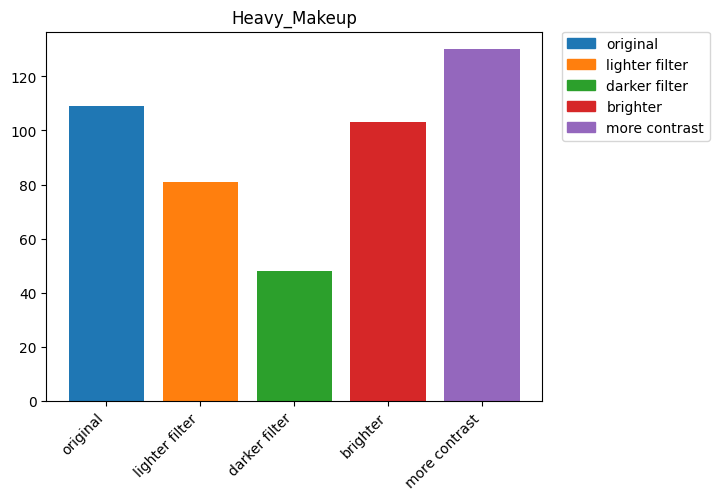

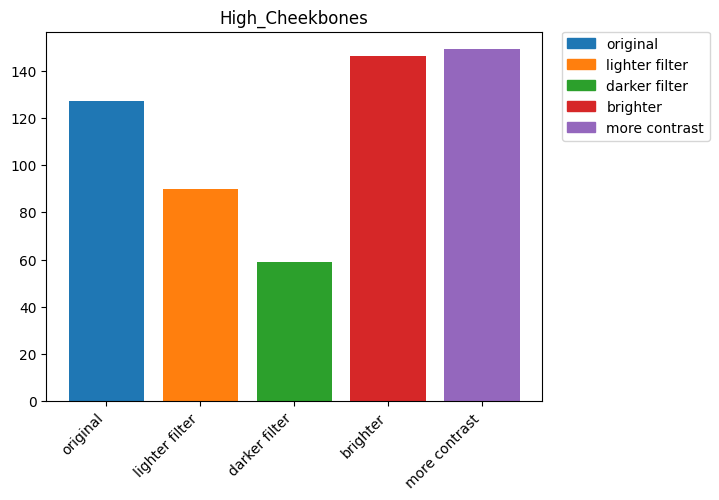

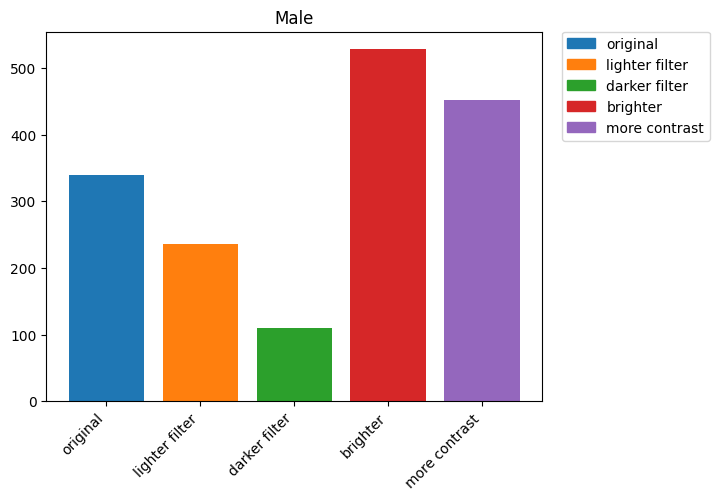

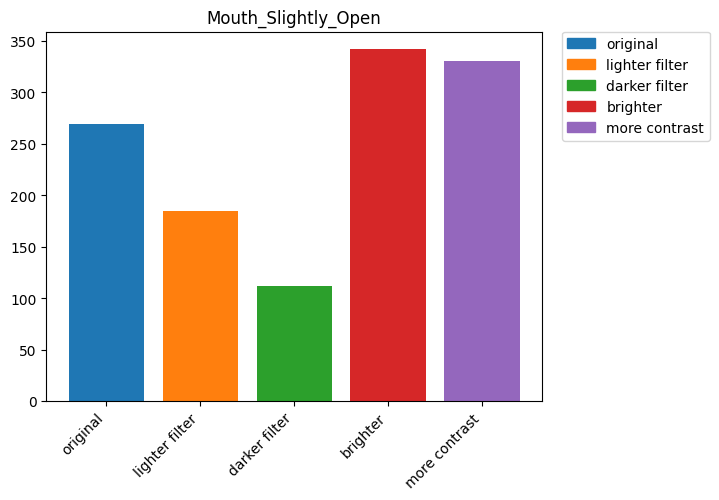

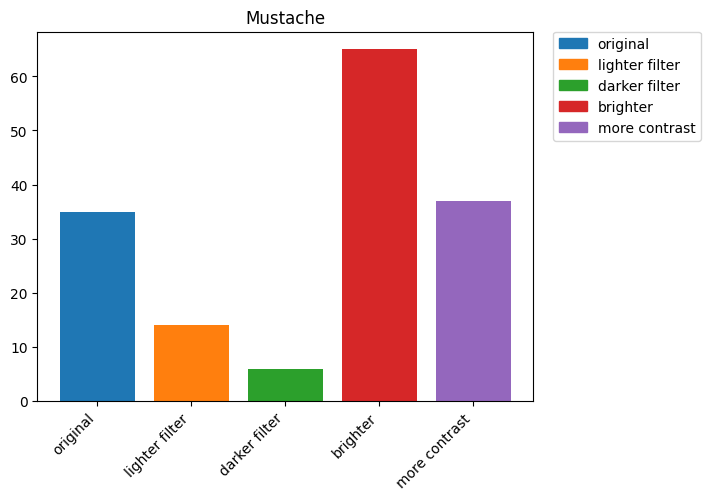

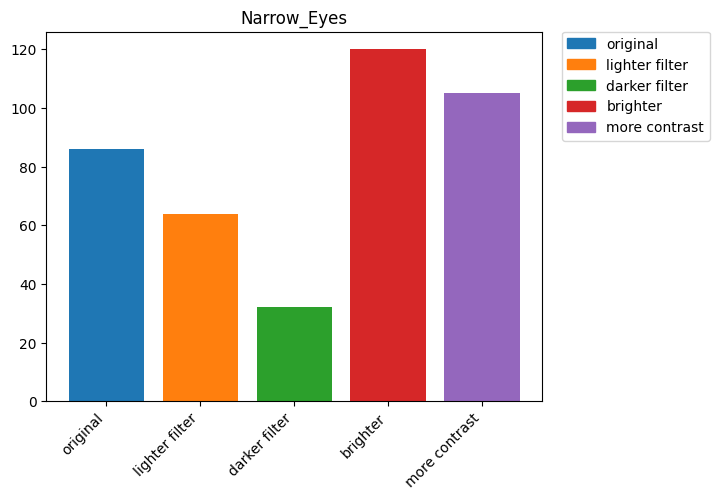

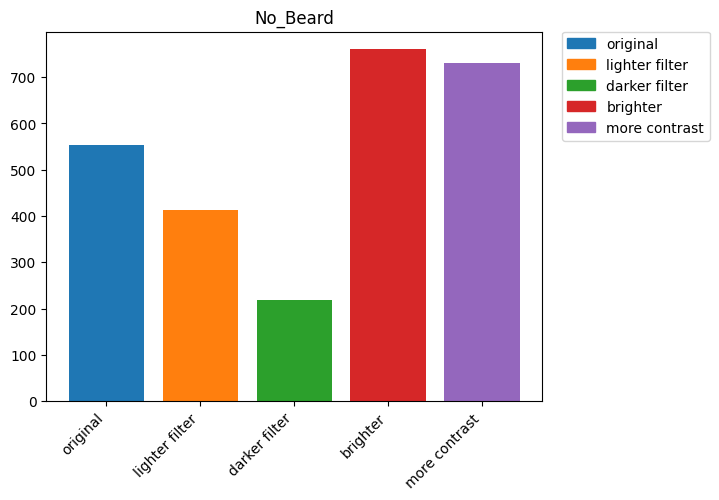

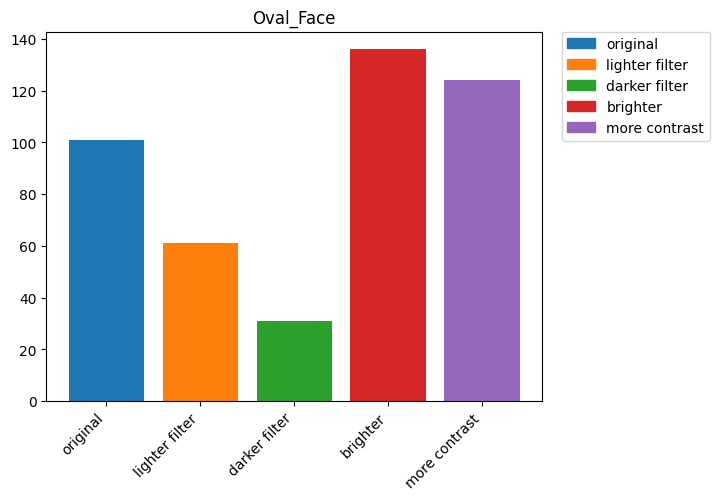

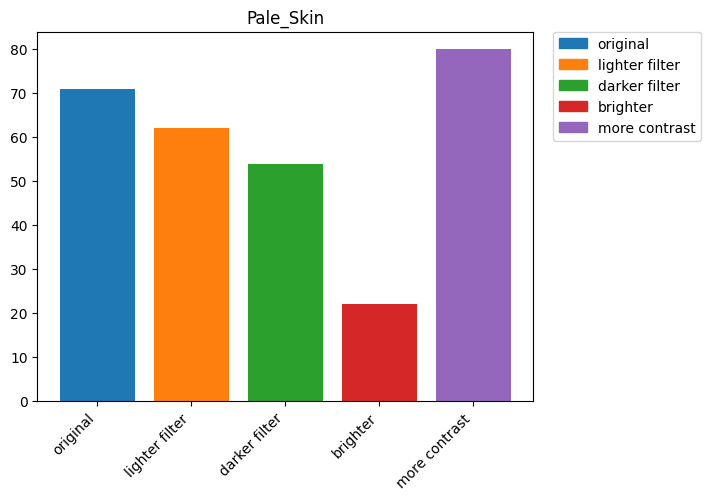

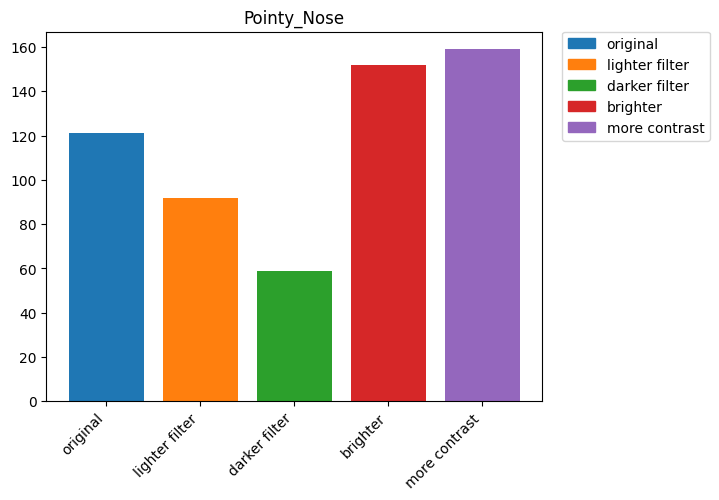

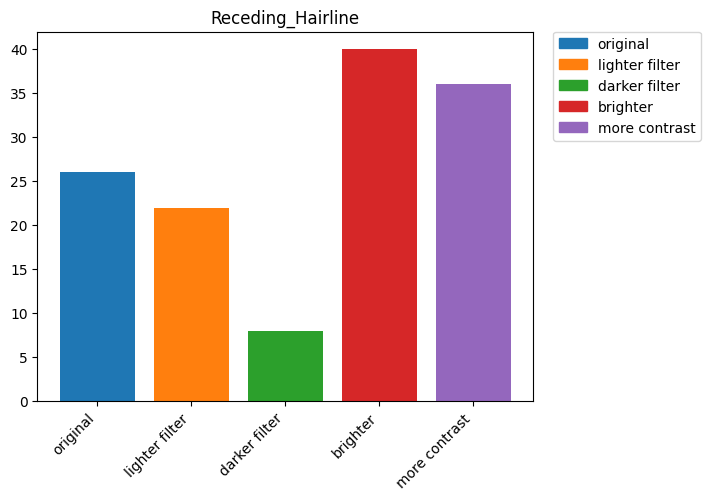

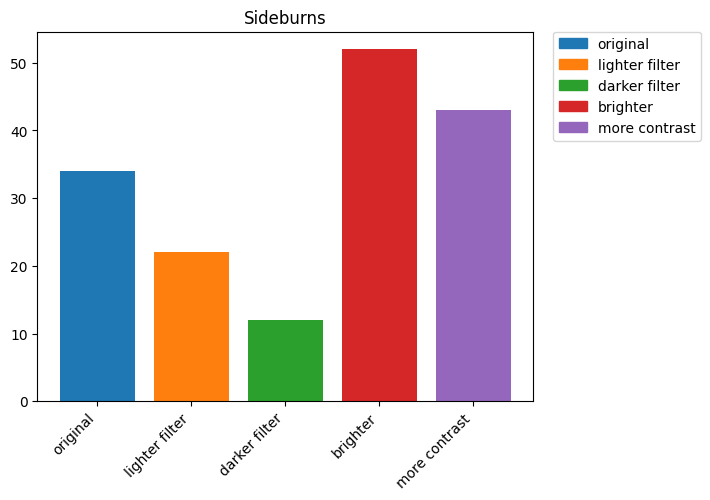

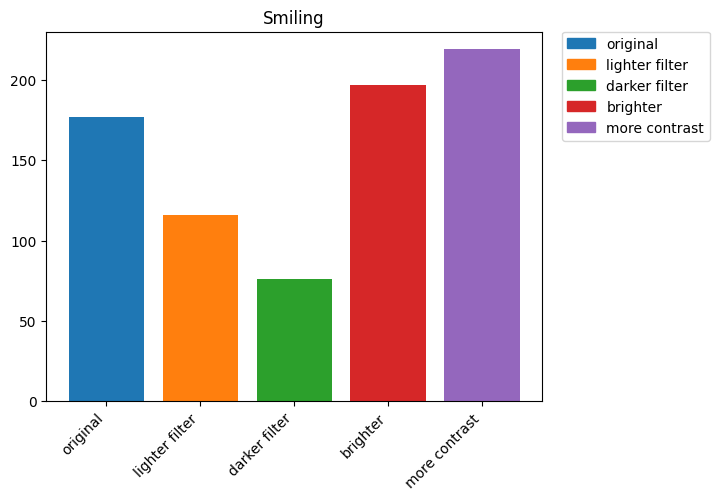

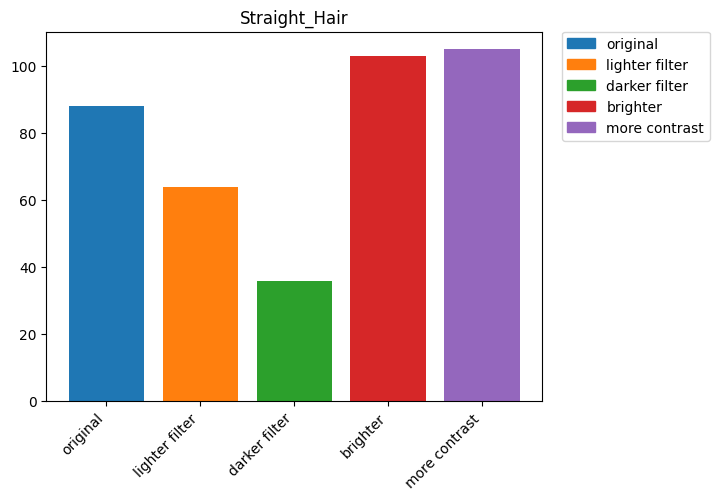

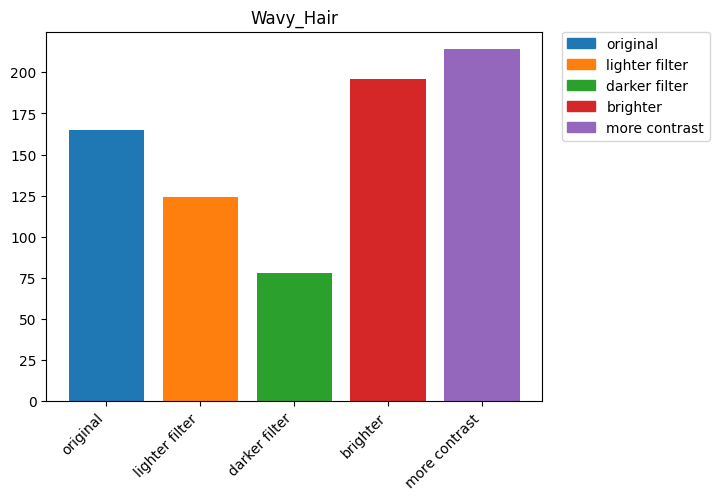

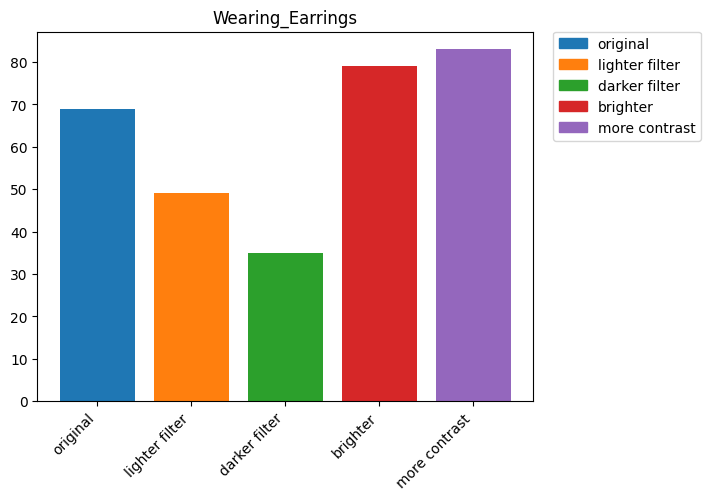

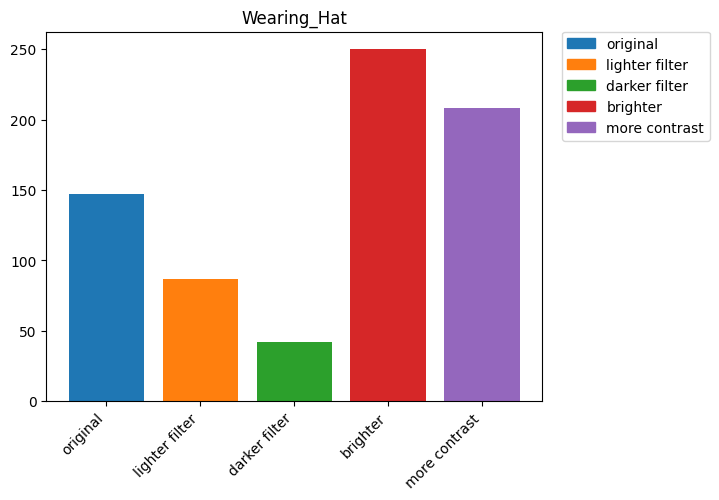

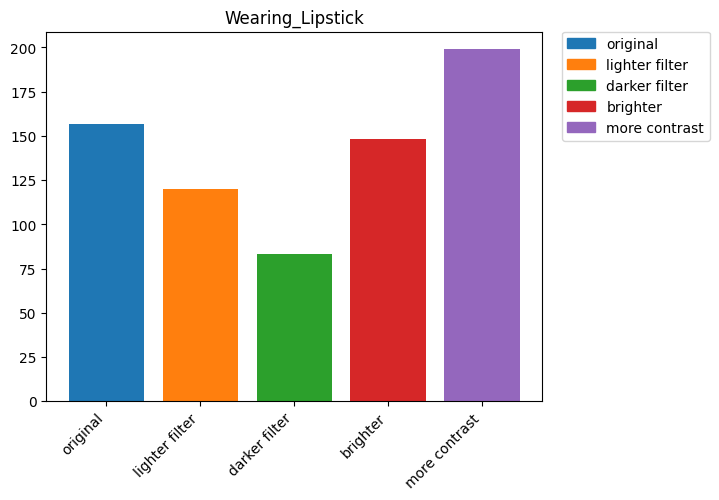

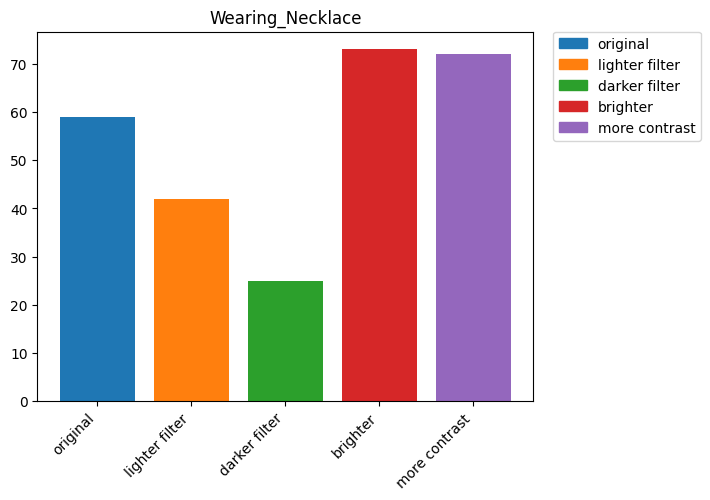

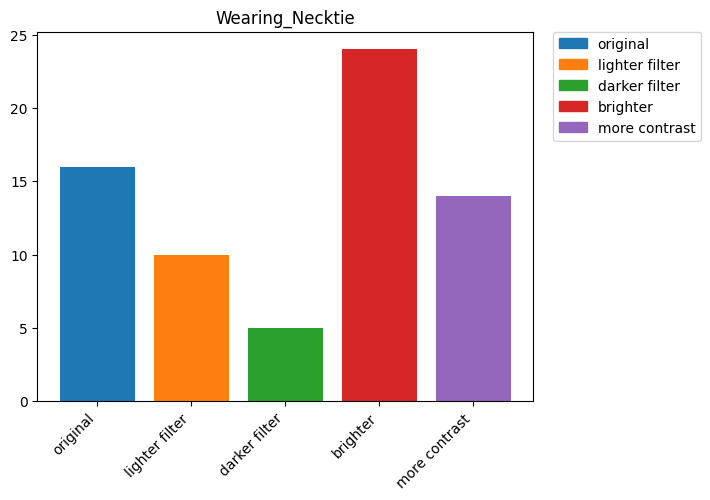

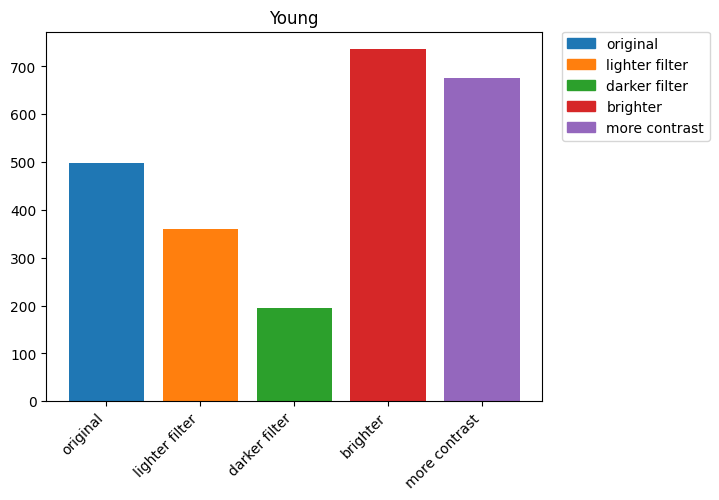

In [26]:
for feature in binary_features:
    if feature == 'Rosy_Cheeks':
        continue

    found_ratios = []
    not_found_ratios = []
    for aug in augs:
        filtered_new_df = some_rec_df.query(f'{aug} == 1')
        feature_ratio = filtered_new_df[feature].value_counts() 
        found_ratios.append(feature_ratio[1])
        filtered_new_df = some_rec_df.query(f'{aug} == -1')
        feature_ratio = filtered_new_df[feature].value_counts() 
        not_found_ratios.append(feature_ratio[1])
    fig, ax = plt.subplots()
    ax.bar(t_index, found_ratios,color = mcolors.TABLEAU_COLORS)
    ax.set_title(feature)   
    ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
    color_names = list(mcolors.TABLEAU_COLORS.keys())[:5]
    patches = [mpatches.Patch(color = color_names[i], label = l)for i,l in enumerate(t_index)]
    ax.legend(handles = patches,bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

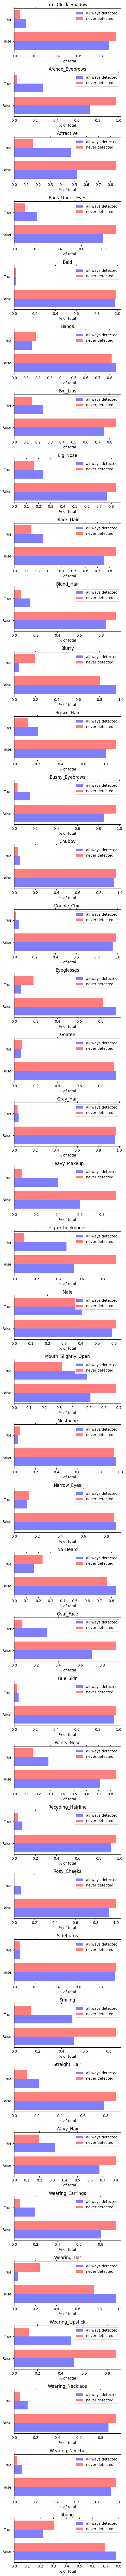

In [28]:
bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(all_rec_df.columns)-5, figsize=(5, 100))

for i, col in enumerate(all_rec_df.columns[:-5]):
    # Calculate the position for the bars
    positions = np.arange(len(all_rec_df[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, all_rec_df[col].value_counts()/len(all_rec_df), height=bar_width, color='blue',
                alpha=0.5, label='all ways detected')

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset, non_rec_df[col].value_counts()/len(non_rec_df), height=bar_width, color='red',
                alpha=0.5, label='never detected')

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(all_rec_df[col].value_counts().index)
    try:
        axs[i].set_yticklabels(['False', 'True'])
    except:
        print('error')
    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()